In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Текстовое описание задачи

Датасет содержит различную информацию о пациентах с целью прогнозирования инсульта на основе различных признаков, например таких как пол, возраст, различные заболевания и т.д

# Загрузка датасета

In [167]:
data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

# Анализ датасета и визуализация

In [168]:
"""
Размерность датасета
Первое число ялвяется кол-ом строк, второе кол-ом столбцов
"""
data.shape

(5110, 12)

In [169]:
"""
Выведем первые 5 и последних строк датасета для общего понимания о том какая в нём содержится информация
"""
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [170]:
"""
Датасет имеет 12 следующих признаков:
"""
patterns = data.columns
for pattern in patterns:
    print(pattern, "\n")

id 

gender 

age 

hypertension 

heart_disease 

ever_married 

work_type 

Residence_type 

avg_glucose_level 

bmi 

smoking_status 

stroke 



Исходя из выше представленных данных можем сказать, что среди признаков имеются **численные** и **категориальные**, а именно
gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status являются категориальными признаками, остальные относятся к численным.
**stroke** признак который будем предсказывать

In [171]:
# Признак id является грубо говоря нумерацией и не несет в себе никакого смысла в дальнейшем, поэтому удалим его.
data.drop(columns = 'id', inplace = True)

In [172]:
"""
Получим общую информацию о датасете
"""
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


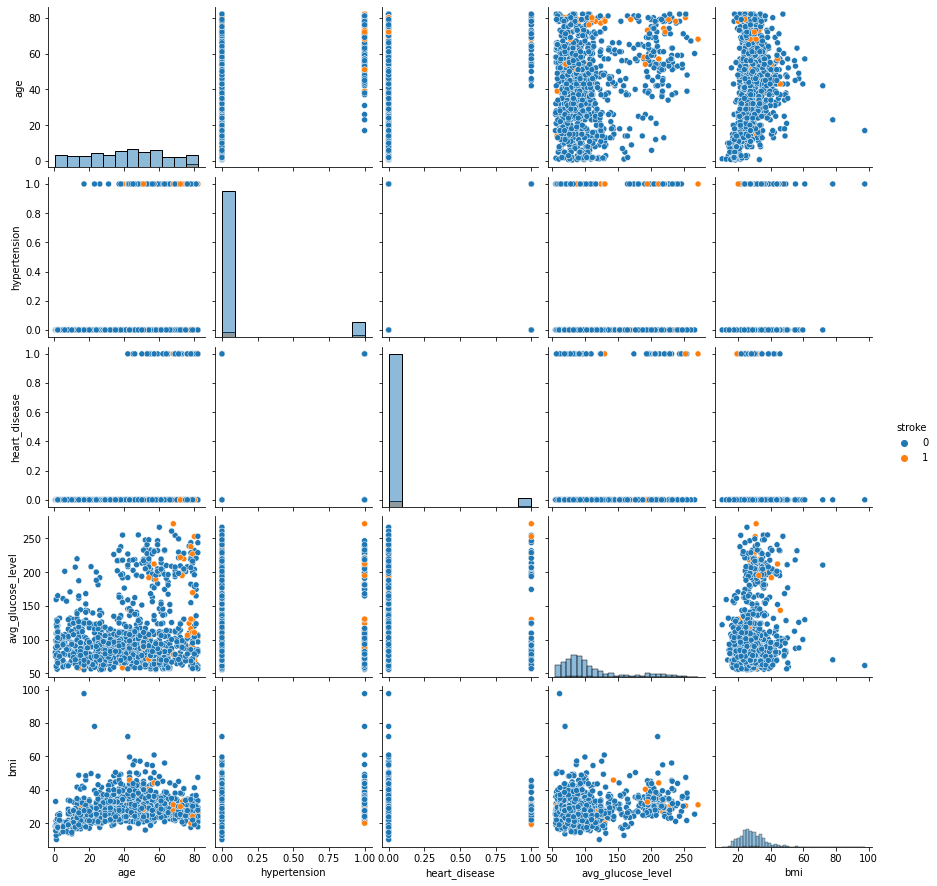

In [173]:
# построим диаграмму рассеивания относительно признака stroke
sns.pairplot(data.iloc[np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)], hue='stroke', diag_kind='hist')

В датасете имеется большое кол во категориальных признаков поэтому диаграмма рассеивания для наших данных не несет в себе особо большего смысла.
Однако из неё все же можно сделать некоторые выводы, например какие признаки "наиболее сильно" связаны с stroke

Чтобы получить немного больше информации о датасете построим матрицу корелляции

<AxesSubplot:>

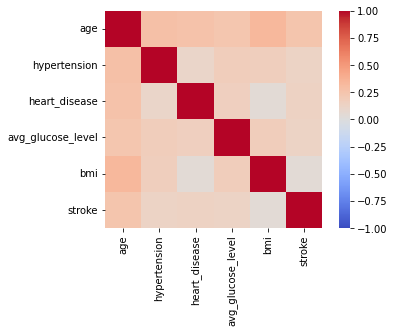

In [174]:
sns.heatmap(data.corr(), square=True, vmin=-1, vmax=1, cmap='coolwarm')

# Преобразования с категориальными признаками

In [175]:
"""
Преобразуем все признаки типа object к категориальным и сделаем их бинарными
"""

cat_col = data.select_dtypes(include = 'object')
cat_col.columns

bnz_data = pd.get_dummies( data =data, drop_first = True)
bnz_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


# Проверка на пропущенные значения

In [176]:
"""
Проверим датасет на наличие пропущенных значений
"""
bnz_data.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Male                         0
gender_Other                        0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [177]:
"""
Пропущенные значения приходятся на признак bmi
Заменим все пропущенные значения следующим образом
"""
bnz_data['bmi'].fillna(bnz_data['bmi'].median(),inplace = True)

In [178]:
bnz_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


# Разделение данных и их стандартизация

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [180]:
# разделим данные на тестовые и тренировочные

X = bnz_data.drop(columns = 'stroke')
y = bnz_data['stroke']

X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =12)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Size train: ',N_train)
print('Size test: ', N_test)

Size train:  4088
Size test:  1022


In [181]:
from sklearn.preprocessing import StandardScaler

# выполним стандартизацию
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.49429535, -0.32520982, -0.23561096, ..., -0.46469656,
        -0.75810972,  2.33190808],
       [-0.53857653, -0.32520982, -0.23561096, ..., -0.46469656,
        -0.75810972,  2.33190808],
       [ 1.23267054,  3.07493788, -0.23561096, ..., -0.46469656,
        -0.75810972, -0.42883337],
       ...,
       [ 1.05554584, -0.32520982,  4.2442848 , ..., -0.46469656,
        -0.75810972, -0.42883337],
       [ 0.87842113, -0.32520982, -0.23561096, ..., -0.46469656,
         1.31907027, -0.42883337],
       [-0.00720241, -0.32520982, -0.23561096, ..., -0.46469656,
        -0.75810972,  2.33190808]])

# Предсказание инсульта с помощью метода к ближайших соседей

In [182]:
knn_default = KNeighborsClassifier(n_neighbors = 2)
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 95.74%, Test: 94.03%. 


Выше представлена точность для тестовой и тренировочной выборки при значении параметра k = 2. Попробуем найти более оптимальное значение

In [183]:
from sklearn.model_selection import GridSearchCV
grid_k = range(1, 10, 1)

knn_grid = KNeighborsClassifier()
grid = GridSearchCV(knn_grid, param_grid = {'n_neighbors':grid_k}, cv = 10)
grid.fit(X_train, y_train)

best_err = 1 - grid.best_score_
best_k_neighbors = grid.best_estimator_.n_neighbors
best_err, best_k_neighbors

(0.0491676254854021, 8)

In [184]:
knn_default = KNeighborsClassifier(n_neighbors = 8)
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 95.21%, Test: 94.81%. 


Мы нашли значение параметра k = 8 которое немного повышает точность на тестовой выборке

# Вывод

В результате анализа было выяснено, что датасет содержит большое количество категориальных признаков, которые были представлены численно. Для применения методов машинного обучения все эти признаки были приведены к бинарным. Кроме того датасет содержит  признак bmi, в котором имелись пропущенные значения. Эти пропущенные значения были устранены путем их замены на медиану. Была проведена стандартизация и наконец выполнено предсказание инсульта с помощью метода к ближайших соседей. В ходе применения данного метода было найдено оптимальное значение к = 8.